# Home Demolition in Palestine(2004-2021)

Israel's forced demolitions of Palestine's houses is a common theme that should be classified under war crimes. Israel demolish houses for three main reasons: on-grounds of unlawful construction, for military purposes and as punishments.

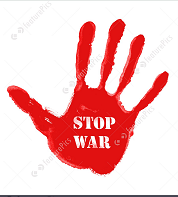

In [ ]:
#import all the libraries
import pandas as pd
import plotly.express as px
import folium



In [ ]:
df=pd.read_csv('../input/../input/home-demolitions-in-palestine-20042021/House Demolitions in Palestine.csv')

df.head()

In [ ]:
df1=df.iloc[0:269, 0:10]
dataTypeSeries = df1.dtypes
#print(dataTypeSeries)

In [ ]:
#change data type
df1.fillna(value=0,inplace=True)
df1["Year"]=df1["Year"].apply(int)
df1["Housing Units"]=df1["Housing Units"].apply(int)
df1['People Left Homeless']=df1['People Left Homeless'].str.replace(',', '')
df1['People Left Homeless'] = pd.to_numeric(df1['People Left Homeless'], errors = 'coerce')
df1["Minors Left Homeless"]=df1["Minors Left Homeless"].apply(int)
#print(df1.dtypes)

In [ ]:
#correct district name
df1.rename(columns={'Demolition Reason':'Reason'}, inplace = True)
df1.loc[df1.Reason == 'Demolition for alleged military purposes','Reason'] = 'Alleged military purposes'
df1.loc[df1.Reason == 'Demolition of houses as punishment','Reason'] = 'Punishment'
df1.loc[df1.Reason == 'Demolition on the pretext of unlawful construction','Reason'] = 'Pretext of unlawful construction'

df1.loc[df1.District == 'Herbon','District'] = 'Hebron'
df1.loc[df1.District == 'Herbron','District'] = 'Hebron'
df1.loc[df1.District == 'Noth Gaza','District'] = 'North Gaza'
df1.loc[df1.District == 'Talkum','District'] = 'Tulkarm'
vn=df1.groupby('District')['District'].count()
#print(vn)

In [ ]:
#Structures demolished by year
dataframe = pd.DataFrame(df1, columns = ['Year', 'Housing Units', 'People Left Homeless', 'Minors Left Homeless'])
df_f=dataframe.groupby(['Year']).sum()
df_f = df_f.reset_index(inplace=False)
#print(df_f)

In [ ]:
df_m=pd.melt(df_f,id_vars=["Year"], value_vars=["Housing Units","People Left Homeless","Minors Left Homeless"],value_name="Total",var_name="Affectees")
#print(df_m)

# Structures demolished by year

In [ ]:
#Chart-Structures demolished by year

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig = px.bar(df_m, x="Year", y="Total", color="Affectees", barmode="group",title="Structures demolished by year")

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
),
bargap=0.15,
bargroupgap=0.1
fig.show()

In [ ]:
#Structures demolished by district
dataframe1 = pd.DataFrame(df1, columns = ['District', 'Housing Units', 'People Left Homeless', 'Minors Left Homeless'])
df_f1=dataframe1.groupby(['District']).sum()
#df_f.loc['Grand Total'] = df_f.sum()
df_f1 = df_f1.reset_index()
#print(df_f1)
df_m1=pd.melt(df_f1,id_vars=["District"], value_vars=["Housing Units","People Left Homeless","Minors Left Homeless"],value_name="Total",var_name="Affectees")
#print(df_m1)

# Structures demolished by district

In [ ]:
#Chart-Structures demolished by region
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig1 = px.bar(df_m1, x="District", y="Total", color="Affectees", barmode="group",title="Structures demolished by district")

fig1.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
),

bargap=0.15,
bargroupgap=0.1

fig1.show()

In [ ]:
# Structures demolished by Area & Districts
dataframe2 = pd.DataFrame(df1, columns = ['Area','District','Housing Units'])
df_f2=dataframe2.groupby(['Area','District']).sum()
df_f2 = df_f2.reset_index(inplace=False)
#print(df_f2)
df_m2=pd.melt(df_f2,id_vars=['Area','District'], value_vars=["Housing Units"],value_name="Total",var_name="Housing Units")
#print(df_m2)

# Structures demolished by Area & Districts

In [ ]:
# Chart-Structures demolished by Area & Districts
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}
fig7 = px.sunburst(df_m2, path=['Area','District'], values='Total',title="Structures demolished by Area & Districts")
fig7.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

fig7.show()

In [ ]:
#Houses demolish reason
dataframe2 = pd.DataFrame(df1, columns = ['District', 'Housing Units','Reason'])
df_f2=dataframe2.groupby(['District','Reason']).sum()
#df_f.loc['Grand Total'] = df_f.sum()
df_f2 = df_f2.reset_index()
#print(df_f2)
df_m2=pd.melt(df_f2,id_vars=["District","Reason"], value_vars=["Housing Units"],value_name="Total",var_name="Housing Units")
#print(df_m2)

# Houses Demolished Reason

In [ ]:
#Chart-Houses demolished reason
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig44 = px.pie(df_m2, values='Total', names='Reason',color_discrete_sequence=px.colors.sequential.RdBu,title="Houses Demolished Reason")
fig44.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)
fig44.show()

# Satellite map for houses demolished in Palestine:

In [ ]:
#Satellite map-Houses Demolished in Palestine
my_map4 = folium.Map(location = [31.15240, 34.99482],
                                        zoom_start = 7)

folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
       ).add_to(my_map4)
folium.Marker([31.7764, 35.2269],
              popup = 'District:Al-Quds'+'\n Total:331',icon=folium.Icon(color='red',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.7058, 35.2007],
              popup = 'District:Bethlehem'+'\n Total:141',icon=folium.Icon(color='blue',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.4175, 34.351],
              popup = 'District:Deir al-Balah'+'\n Total:52',icon=folium.Icon(color='purple',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.7683, 35.2137],
              popup = 'District:East Jerusalem'+'\n Total:1609',icon=folium.Icon(color='green',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.5016, 34.4667],
              popup = 'District:Gaza'+'\n Total:108',icon=folium.Icon(color='pink',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.5294, 35.0938],
              popup = 'District:Hebron'+'\n Total:315',icon=folium.Icon(color='orange',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.4621, 35.3025],
              popup = 'District:Jenin'+'\n Total:70',icon=folium.Icon(color='lightgray',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.8667, 35.45],
              popup = 'District:Jericho'+'\n Total:295',icon=folium.Icon(color='beige',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.35, 34.2997],
              popup = 'District:Khan Yunis'+'\n Total:471',icon=folium.Icon(color='lightred',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.2211, 35.2544],
              popup = 'District:Nablus'+'\n Total:264',icon=folium.Icon(color='lightgreen',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.55, 34.5],
              popup = 'District:North Gaza'+'\n Total:229',icon=folium.Icon(color='darkgreen',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.196, 34.9815],
              popup = 'District:Qalqiliya'+'\n Total:46',icon=folium.Icon(color='darkred',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.287, 34.2595],
              popup = 'District:Rafah'+'\n Total:923',icon=folium.Icon(color='darkpurple',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([31.8996, 35.2042],
              popup = 'District:Ramallah and al-Bira'+'\n Total:162',icon=folium.Icon(color='darkblue',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.0851, 35.1808],
              popup = 'District:Salfit'+'\n Total:28',icon=folium.Icon(color='cadetblue',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.3209, 35.3699],
              popup = 'District:Tubas'+'\n Total:428',icon=folium.Icon(color='gray',icon='home', prefix='fa')).add_to(my_map4)
folium.Marker([32.3104, 35.0286],
              popup = 'District:Tulkarm'+'\n Total:26',icon=folium.Icon(color='black',icon='home', prefix='fa')).add_to(my_map4)
my_map4


# Jornalist & Social worker Death:

There are 22 Journalists & Social worker Killed in Israel and the Occupied Palestinian Territory.

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/6512105"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')


# What weapons are being used in the Israel-Gaza conflict

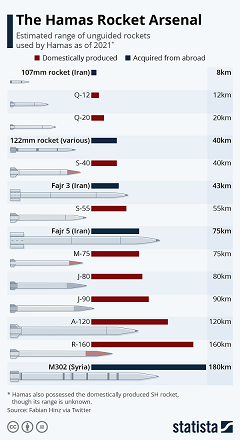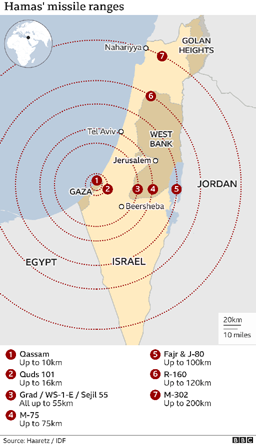

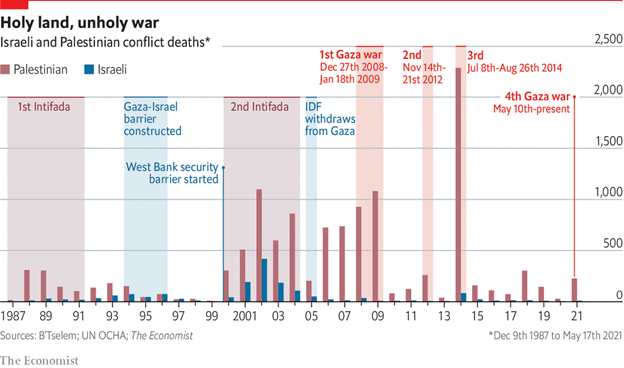

# House Demolition and Mental Health:Victims and Witnesses

**For Adult:**
Means of anxiety, depression, and paranoiac symptoms for the adults,
were compared between the loss, witness, and control groups and between
men and women by using a two-way ANOVA test. Whenever a significant
F-ratio was found, the means were compared using T-tests. The ANOVA
main effects and interactions of sex and nature of trauma on psychological
problems are presented in Table I.


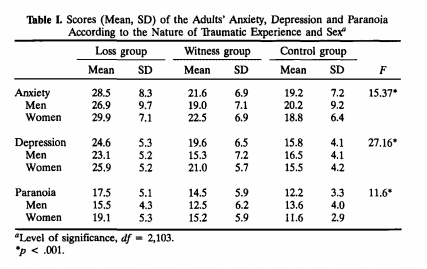

**For Children:**
Children whose homes were demolished showed significantly more
psychological symptoms than the children in the witness and control groups
(F = 72.14, df = 2,118, p < 0.001). Also, the children in the witness group
showed significantly more symptoms than the control group (t = 4.20, p
< 0.0001)

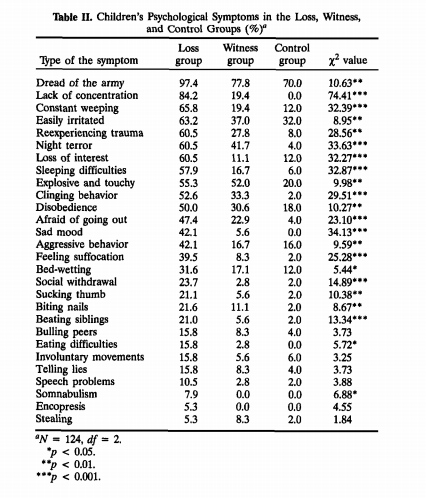

# Please do leave your comments /suggestions and if you like this kernel greatly appreciate to UPVOTE .